In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf


In [ ]:
start = '2010-01-01'
end = '2025-06-17'

df = yf.download('GOOGL', start=start, end=end)
df.head()   #Shows the first 5 rows of the DataFrame

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2010-01-04,15.590931,15.659589,15.528494,15.595906,78169752
2010-01-05,15.522272,15.618045,15.461327,15.601626,120067812
2010-01-06,15.130976,15.568790,15.083712,15.568790,158988852
2010-01-07,14.778734,15.174261,14.742665,15.159335,256315428
2010-01-08,14.975752,15.006348,14.654604,14.726495,188783028


In [62]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2025-06-10,178.600006,181.110001,174.910004,176.199997,61766100
2025-06-11,177.350006,180.369995,176.750000,179.770004,31646800
2025-06-12,175.699997,176.720001,174.750000,176.179993,20941900
2025-06-13,174.669998,177.130005,172.389999,172.440002,27663100
2025-06-16,176.770004,176.940002,174.649994,174.729996,27389200


In [63]:
df.reset_index(inplace=True)
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
0,2010-01-04,15.590931,15.659589,15.528494,15.595906,78169752
1,2010-01-05,15.522272,15.618045,15.461327,15.601626,120067812
2,2010-01-06,15.130976,15.568790,15.083712,15.568790,158988852
3,2010-01-07,14.778734,15.174261,14.742665,15.159335,256315428
4,2010-01-08,14.975752,15.006348,14.654604,14.726495,188783028


In [65]:
#df = df.drop(['Date'], axis=1)
df.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
0,15.590931,15.659589,15.528494,15.595906,78169752
1,15.522272,15.618045,15.461327,15.601626,120067812
2,15.130976,15.568790,15.083712,15.568790,158988852
3,14.778734,15.174261,14.742665,15.159335,256315428
4,14.975752,15.006348,14.654604,14.726495,188783028


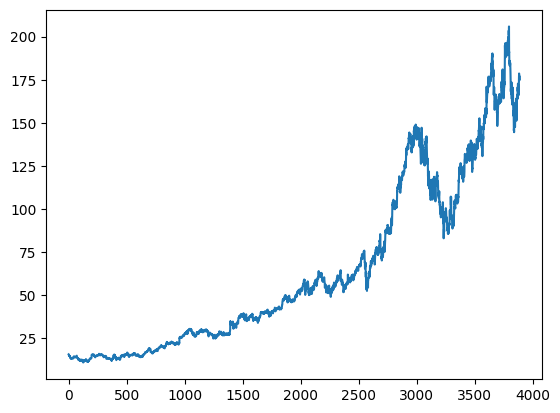

In [66]:
plt.plot(df.Close)

In [67]:
df

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
0,15.590931,15.659589,15.528494,15.595906,78169752
1,15.522272,15.618045,15.461327,15.601626,120067812
2,15.130976,15.568790,15.083712,15.568790,158988852
3,14.778734,15.174261,14.742665,15.159335,256315428
4,14.975752,15.006348,14.654604,14.726495,188783028
...,...,...,...,...,...
3882,178.600006,181.110001,174.910004,176.199997,61766100
3883,177.350006,180.369995,176.750000,179.770004,31646800
3884,175.699997,176.720001,174.750000,176.179993,20941900


In [68]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,GOOGL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3882,170.154483
3883,170.003432
3884,169.805054
3885,169.575925


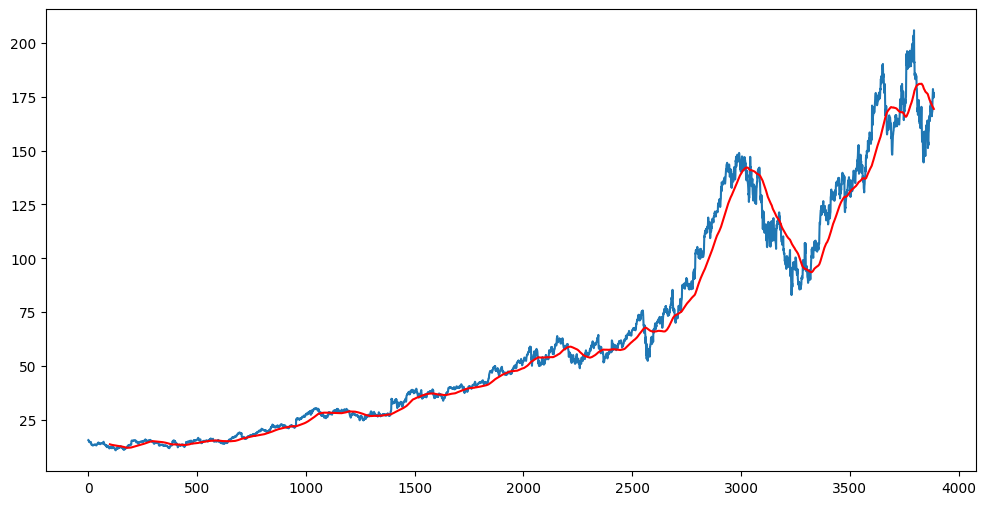

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [72]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,GOOGL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3882,171.020258
3883,171.091957
3884,171.146349
3885,171.192904


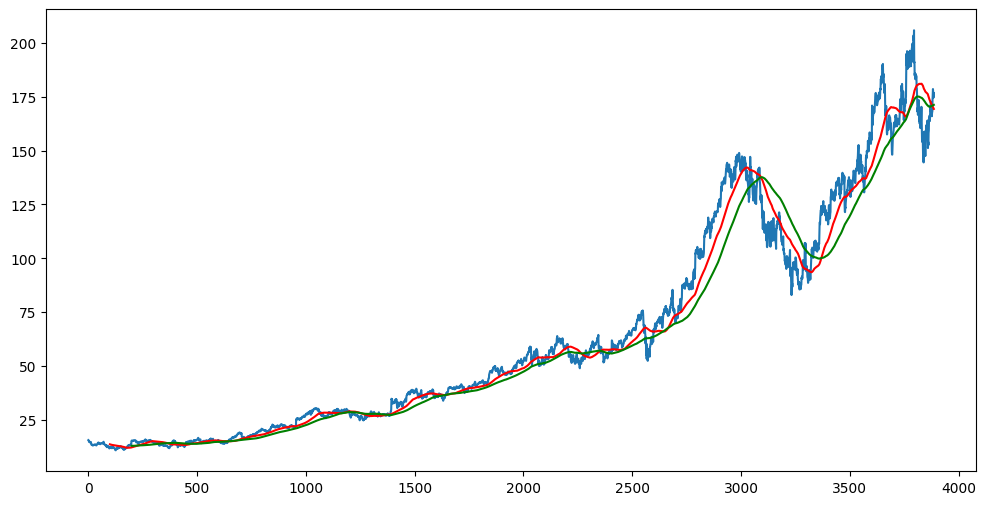

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [23]:
df.shape

(3887, 5)

In [74]:
#Splitting the data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2720, 1)
(1167, 1)


In [75]:
data_training.head()

Ticker,GOOGL
0,15.590931
1,15.522272
2,15.130976
3,14.778734
4,14.975752


In [76]:
data_testing.head()

Ticker,GOOGL
2720,79.854080
2721,81.162247
2722,78.742249
2723,79.467407
2724,75.089661


In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [78]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.06366025],
       [0.06273877],
       [0.05748718],
       ...,
       [0.87496799],
       [0.88906277],
       [0.91234958]])

In [79]:
data_training_array.shape

(2720, 1)

In [80]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [81]:
#ML Model

In [82]:
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential

In [84]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [85]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_13 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_14 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_15 (LSTM)              (None, 120)              

In [86]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
82/82 [==============================] - 16s 137ms/step - loss: 0.0276
Epoch 2/50
82/82 [==============================] - 11s 138ms/step - loss: 0.0069
Epoch 3/50
82/82 [==============================] - 12s 140ms/step - loss: 0.0056
Epoch 4/50
82/82 [==============================] - 12s 147ms/step - loss: 0.0049
Epoch 5/50
82/82 [==============================] - 11s 138ms/step - loss: 0.0046
Epoch 6/50
82/82 [==============================] - 14s 169ms/step - loss: 0.0038
Epoch 7/50
82/82 [==============================] - 11s 140ms/step - loss: 0.0041
Epoch 8/50
82/82 [==============================] - 11s 140ms/step - loss: 0.0038
Epoch 9/50
82/82 [==============================] - 11s 137ms/step - loss: 0.0039
Epoch 10/50
82/82 [==============================] - 12s 141ms/step - loss: 0.0035
Epoch 11/50
82/82 [==============================] - 12s 141ms/step - loss: 0.0036
Epoch 12/50
82/82 [==============================] - 13s 158ms/step - loss: 0.0033
Epoch 13/50
8

In [87]:
model.save('keras_model.h5')

In [88]:
data_testing.head()

Ticker,GOOGL
2720,79.854080
2721,81.162247
2722,78.742249
2723,79.467407
2724,75.089661


In [90]:
data_training.tail(100)

Ticker,GOOGL
2620,71.685570
2621,71.533485
2622,70.293434
2623,71.571762
2624,71.970375
...,...
2715,77.309845
2716,77.917694
2717,76.041451
2718,77.091652


In [91]:
past_100_days = data_training.tail(100)

In [92]:
#final_df = past_100_days.append(data_testing, ignore_index=True)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [93]:
final_df.head()

Ticker,GOOGL
0,71.685570
1,71.533485
2,70.293434
3,71.571762
4,71.970375


In [94]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02869395],
       [0.02759326],
       [0.0186186 ],
       ...,
       [0.78148078],
       [0.77402634],
       [0.78922477]])

In [95]:
input_data.shape

(1267, 1)

In [96]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [97]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1167, 100, 1)
(1167,)


In [98]:
#Making Predictions

y_predicted = model.predict(x_test)

37/37 [==============================] - 2s 37ms/step


In [99]:
y_predicted.shape

(1167, 1)

In [100]:
y_test

array([0.08781216, 0.09727979, 0.07976547, ..., 0.78148078, 0.77402634,
       0.78922477])

In [101]:
y_predicted

array([[0.09145218],
       [0.09338732],
       [0.09541595],
       ...,
       [0.69441116],
       [0.70273876],
       [0.71194243]], dtype=float32)

In [102]:
scaler.scale_

array([0.00723733])

In [103]:
scale_factor = 1/scaler.scale_[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

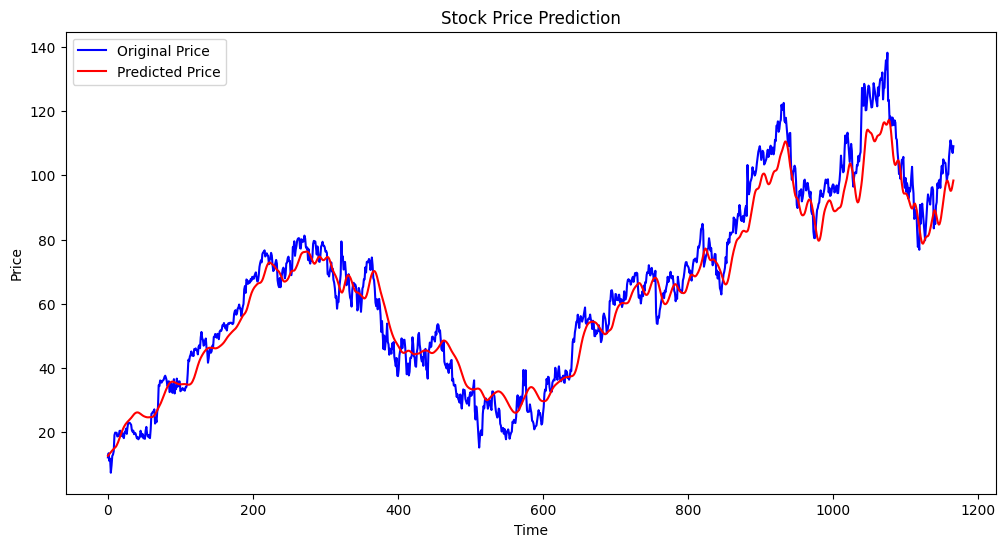

In [104]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()